In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
path = tf.keras.utils.get_file('sunspots.csv', 
                               '  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv')
print (path)

C:\Users\Amir\.keras\datasets\sunspots.csv


In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

<AxesSubplot:xlabel='Date'>

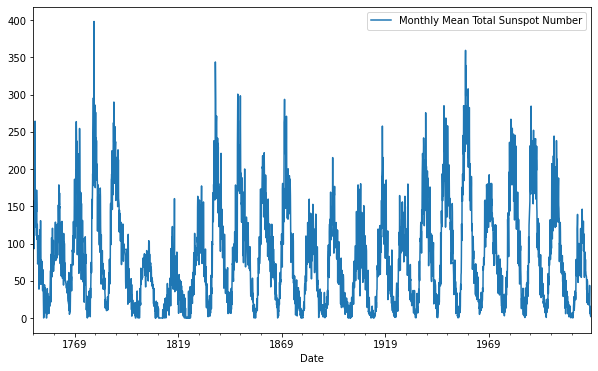

In [4]:
df = pd.read_csv(path, index_col='Date', parse_dates=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.plot(figsize=(10,6))

In [5]:
df.columns = ['Sunspots']   # reaname column

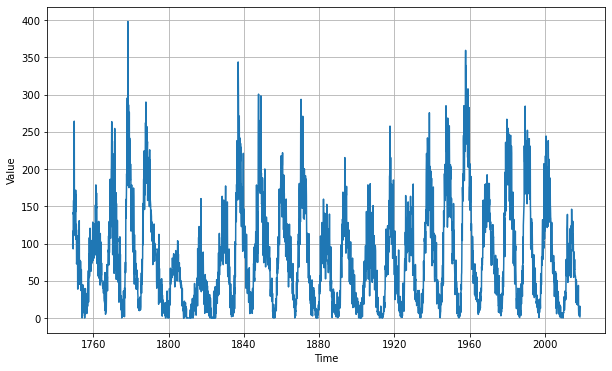

In [6]:
series = np.array(df['Sunspots'])
time = np.array(df.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [7]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [8]:
step_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

generator = TimeseriesGenerator(x_train, x_train,
                                length = step_size, sampling_rate = 1, 
                                batch_size = batch_size, shuffle=True)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[step_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1220      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))

In [13]:
model.fit(generator,epochs=100,verbose=1)

Epoch 1/100
92/92 [==============================] - 0s 1ms/step - loss: 2623.2720
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 979.6954
Epoch 3/100
92/92 [==============================] - 0s 985us/step - loss: 886.7940
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 843.1245
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 870.4443
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 785.6951
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 723.3859
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 788.8367
Epoch 9/100
92/92 [==============================] - ETA: 0s - loss: 762.933 - 0s 2ms/step - loss: 779.4408
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 760.1202
Epoch 11/100
92/92 [==============================] - 0s 2ms/step - loss: 718.5074
Epoch 12/100
92/92 [==============================] - 0s 2ms/step -

In [14]:
forecast=[]
for time in range(len(series) - step_size):
  forecast.append(model.predict(series[time:time + step_size][np.newaxis]))

In [15]:
forecast = forecast[split_time-step_size:]
results = np.array(forecast)[:, 0, 0]

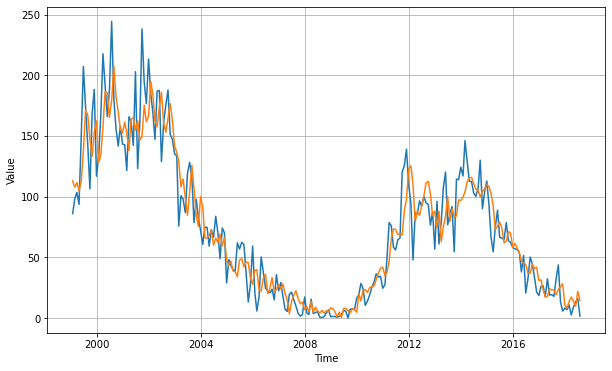

In [16]:
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [17]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

14.937097